<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B1%5D_cHB_DT_Kfold_MAPE_MAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080920.csv')
Oil_Yields = data['Bio-crude Oil Yield']
Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,100.000000,0.001,0.001,0.001,0.001,0.001,0.001,85.50
30,30.906000,27.270,0.001,0.001,32.724,0.001,9.100,41.00
60,13.300000,25.500,0.001,0.001,38.700,0.001,0.001,27.10
90,6.521739,65.217,0.001,0.001,20.652,0.001,8.000,38.00
120,1.933333,23.433,66.400,0.001,7.967,0.001,0.001,23.60
150,0.001000,0.001,0.001,0.001,100.000,0.001,0.001,1.29
180,0.001000,0.001,39.200,35.100,0.001,20.200,0.001,26.98
210,0.001000,0.001,0.001,100.000,0.001,0.001,0.001,6.50


In [2]:
# TODO: Minimum price of the data
minimum_Oil_Yields = np.min(Oil_Yields)

# TODO: Maximum price of the data
maximum_Oil_Yields = np.max(Oil_Yields)

# TODO: Mean price of the data
mean_Oil_Yields = np.mean(Oil_Yields)

# TODO: Median price of the data
median_Oil_Yields = np.median(Oil_Yields)

# TODO: Standard deviation of prices of the data
std_Oil_Yields = np.std(Oil_Yields)

# Show the calculated statistics

print("Statistics for bio-crude dataset:\n")
print("Minimum bio-crude oil yield:{: .2f} wt%".format(minimum_Oil_Yields))
print("Maximum bio-crude oil yield:{: .2f} wt%".format(maximum_Oil_Yields))
print("Mean bio-crude oil yield:{: .2f} wt%".format(mean_Oil_Yields))
print("Median bio-crude oil yield:{: .2f} wt%".format(median_Oil_Yields))
print("Standard deviation of bio-crude oil yield:{: .2f} wt%".format(std_Oil_Yields))

data.describe()

Statistics for bio-crude dataset:

Minimum bio-crude oil yield: 0.10 wt%
Maximum bio-crude oil yield: 95.86 wt%
Mean bio-crude oil yield: 27.44 wt%
Median bio-crude oil yield: 24.70 wt%
Standard deviation of bio-crude oil yield: 16.71 wt%


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,11.914957,26.309120,17.238889,7.373533,17.048222,9.141262,6.412529,27.438684
std,20.186968,25.336847,25.591166,15.388090,23.677315,17.012555,10.787539,16.748694
min,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.100000
25%,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,15.900000
50%,3.500000,23.077000,0.001000,0.001000,8.700000,0.001000,1.100000,24.700000
75%,13.880000,46.420000,29.200000,8.800000,25.460000,14.200000,7.000000,36.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,95.860000


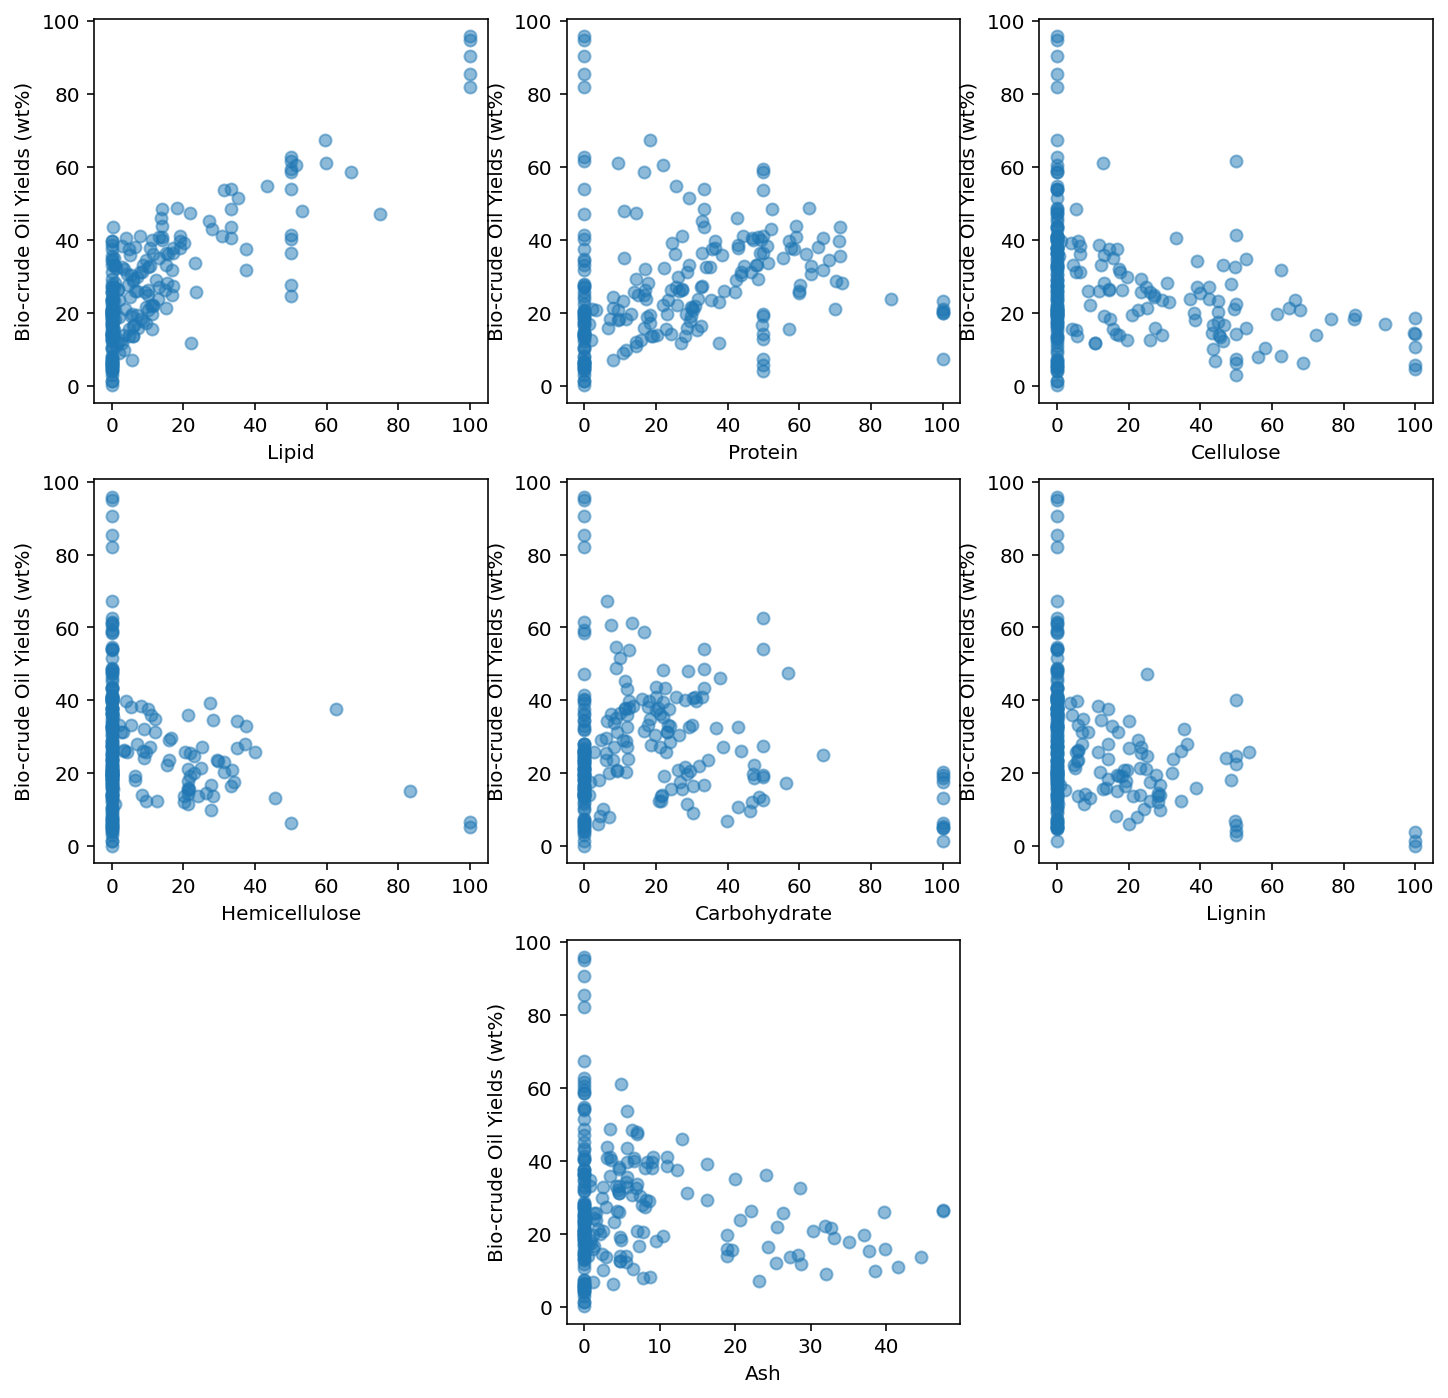

In [3]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

(array([ 3.,  2.,  8.,  8.,  3.,  5., 10., 13., 11., 12., 20.,  8., 11.,
        12., 11.,  6.,  9.,  9.,  8., 10.,  8.,  8.,  4.,  2.,  2.,  4.,
         1.,  0.,  4.,  0.,  3.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.]),
 array([ 0.1   ,  2.0152,  3.9304,  5.8456,  7.7608,  9.676 , 11.5912,
        13.5064, 15.4216, 17.3368, 19.252 , 21.1672, 23.0824, 24.9976,
        26.9128, 28.828 , 30.7432, 32.6584, 34.5736, 36.4888, 38.404 ,
        40.3192, 42.2344, 44.1496, 46.0648, 47.98  , 49.8952, 51.8104,
        53.7256, 55.6408, 57.556 , 59.4712, 61.3864, 63.3016, 65.2168,
        67.132 , 69.0472, 70.9624, 72.8776, 74.7928, 76.708 , 78.6232,
        80.5384, 82.4536, 84.3688, 86.284 , 88.1992, 90.1144, 92.0296,
        93.9448, 95.86  ]),
 <a list of 50 Patch objects>)

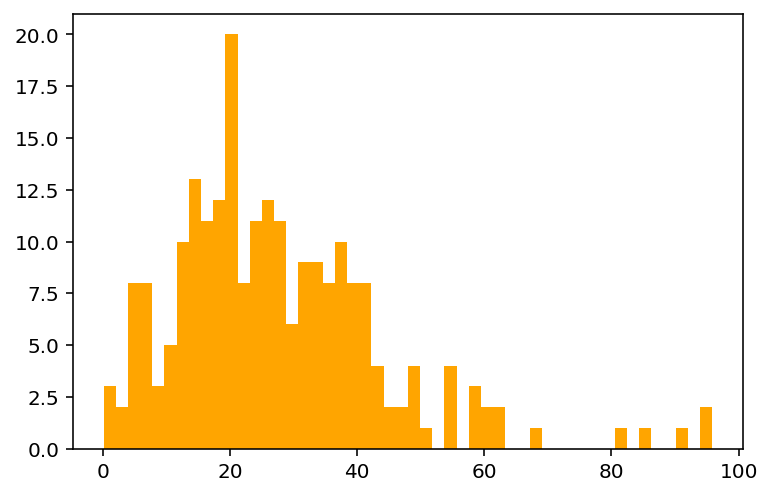

In [4]:
plt.hist(data['Bio-crude Oil Yield'],bins=50,color='orange')

(array([105.,  11.,  15.,  10.,  10.,  11.,   9.,   7.,   5.,   4.,   2.,
          3.,   0.,   2.,   0.,   2.,   4.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,  10.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.]),
 array([1.000000e-03, 2.000980e+00, 4.000960e+00, 6.000940e+00,
        8.000920e+00, 1.000090e+01, 1.200088e+01, 1.400086e+01,
        1.600084e+01, 1.800082e+01, 2.000080e+01, 2.200078e+01,
        2.400076e+01, 2.600074e+01, 2.800072e+01, 3.000070e+01,
        3.200068e+01, 3.400066e+01, 3.600064e+01, 3.800062e+01,
        4.000060e+01, 4.200058e+01, 4.400056e+01, 4.600054e+01,
        4.800052e+01, 5.000050e+01, 5.200048e+01, 5.400046e+01,
        5.600044e+01, 5.800042e+01, 6.000040e+01, 6.200038e+01,
        6.400036e+01, 6.600034e+01, 6.800032e+01, 7.000030e+01,
        7.200028e+01, 7.400026e+01, 7.600024e+01, 7.800022e+01,
        8.000020e+

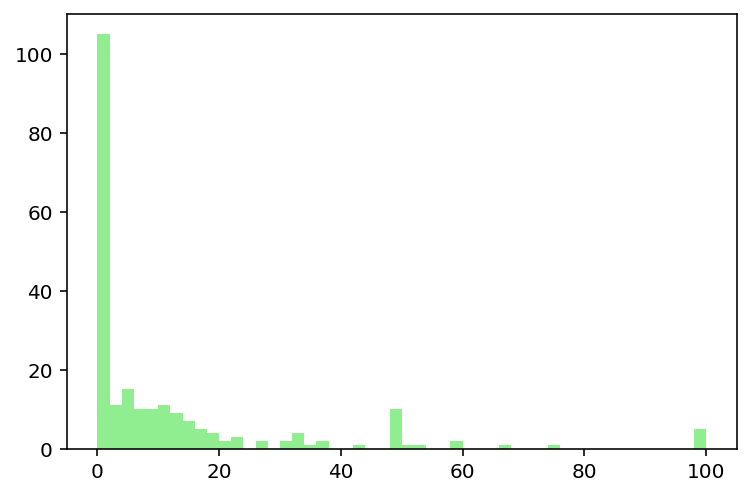

In [5]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


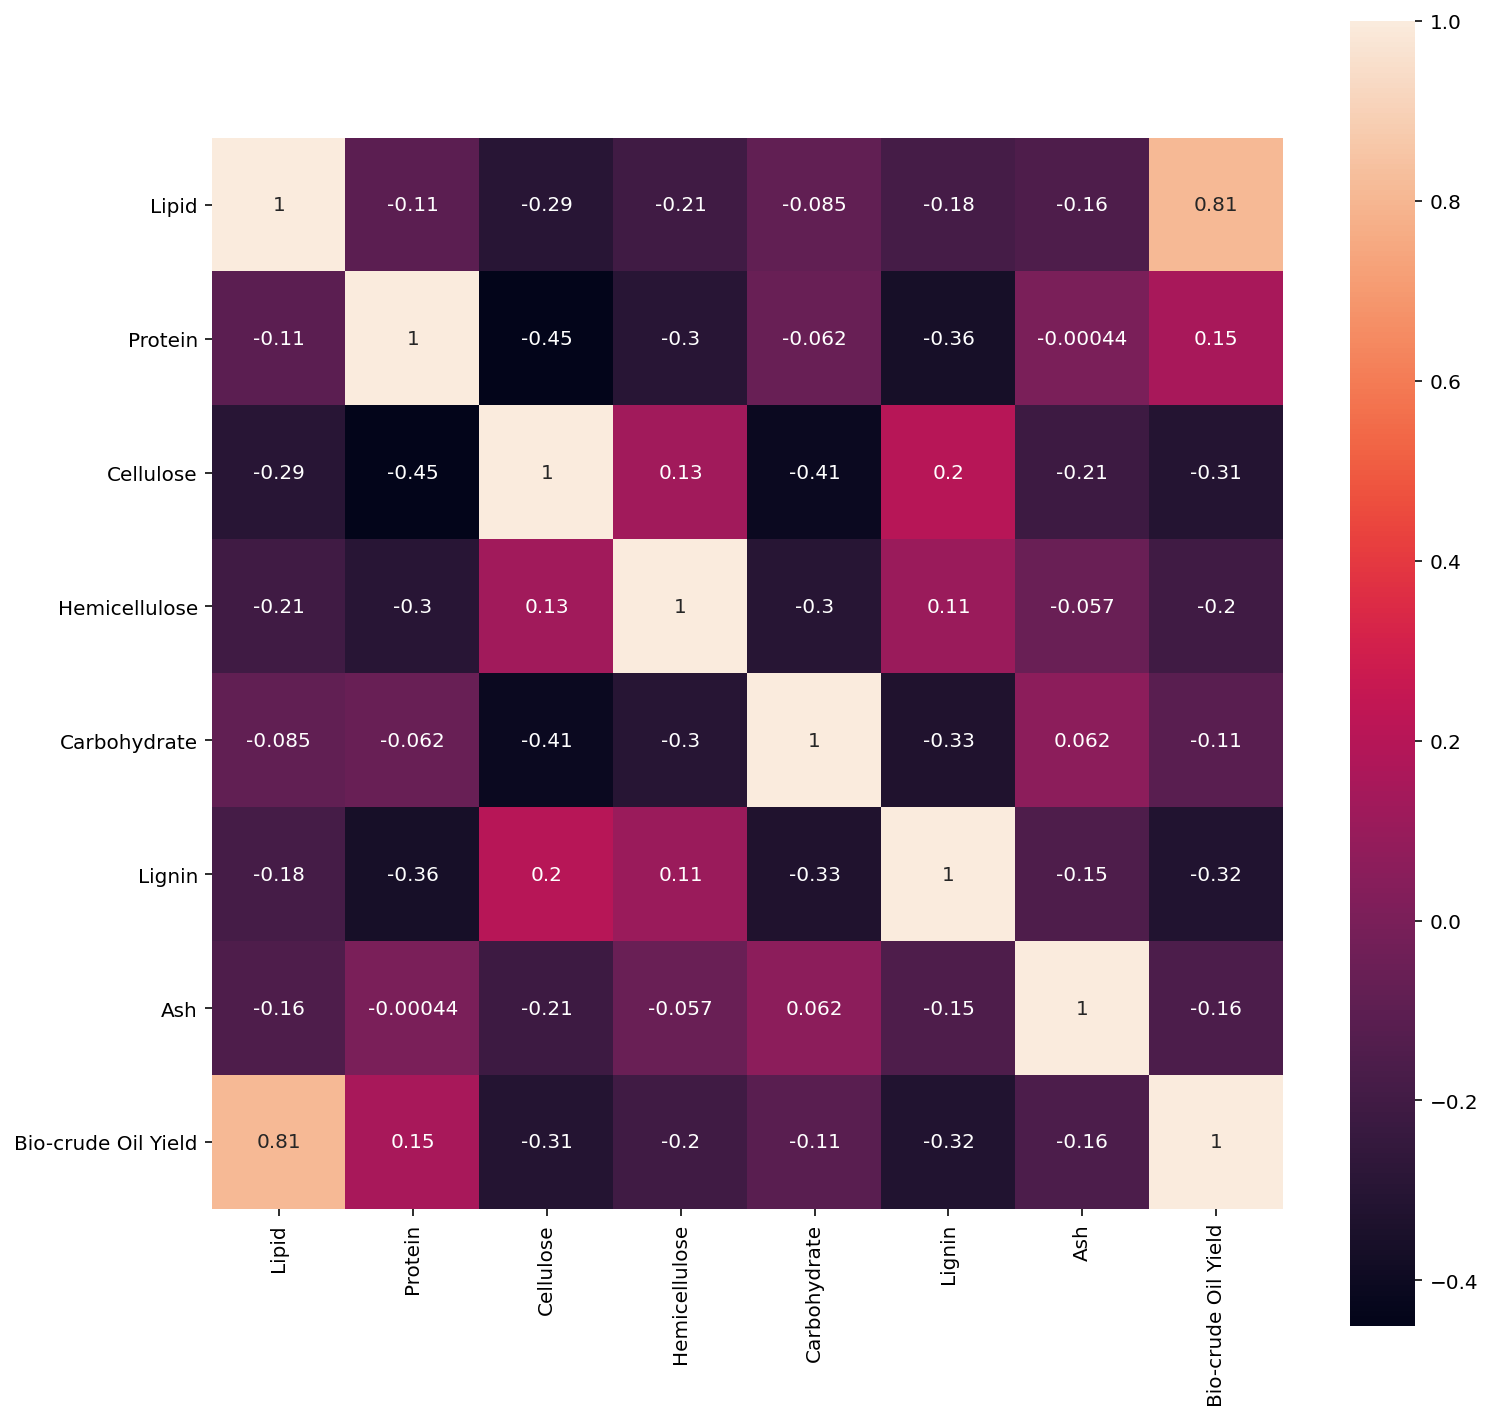

In [6]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [7]:
# Set up Model
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric (y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'
  score = r2_score(y_true, y_predict)

  # Return the score
  return score

In [8]:
# Define predict score
import numpy as np
def performance_metric2(y_true, y_predict):
  """Calculate and reture the ratio of predict value to predict score"""
  y_true_arr = np.arr(y_true)
  y_predict_arr = np.arr(y_predict)

  # Mean value of dataset
  y_true_mean = np.mean(y_true_arr)

  ss_tot = 0
  ss_reg = 0
  ss_res = 0

  for index in range (y_true_arr):
    ss_tot += (y_true_arr[index] - y_true_mean)**2
  
  for index in range (y_true_arr):
    ss_reg += (y_predict_arr[index] - y_true_mean)**2
  
  for index in range (y_true_arr):
    ss_res += (y_predict_arr[index] - y_true_arr[index])**2
  
  score = 1 - (ss_res/ss_tot)

  return score

In [9]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2, random_state=42)

print (Features.shape)
print (X_train.shape)
print (X_test.shape)

# Success
print ("Training and testing split was successful.")

(225, 7)
(180, 7)
(45, 7)
Training and testing split was successful.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

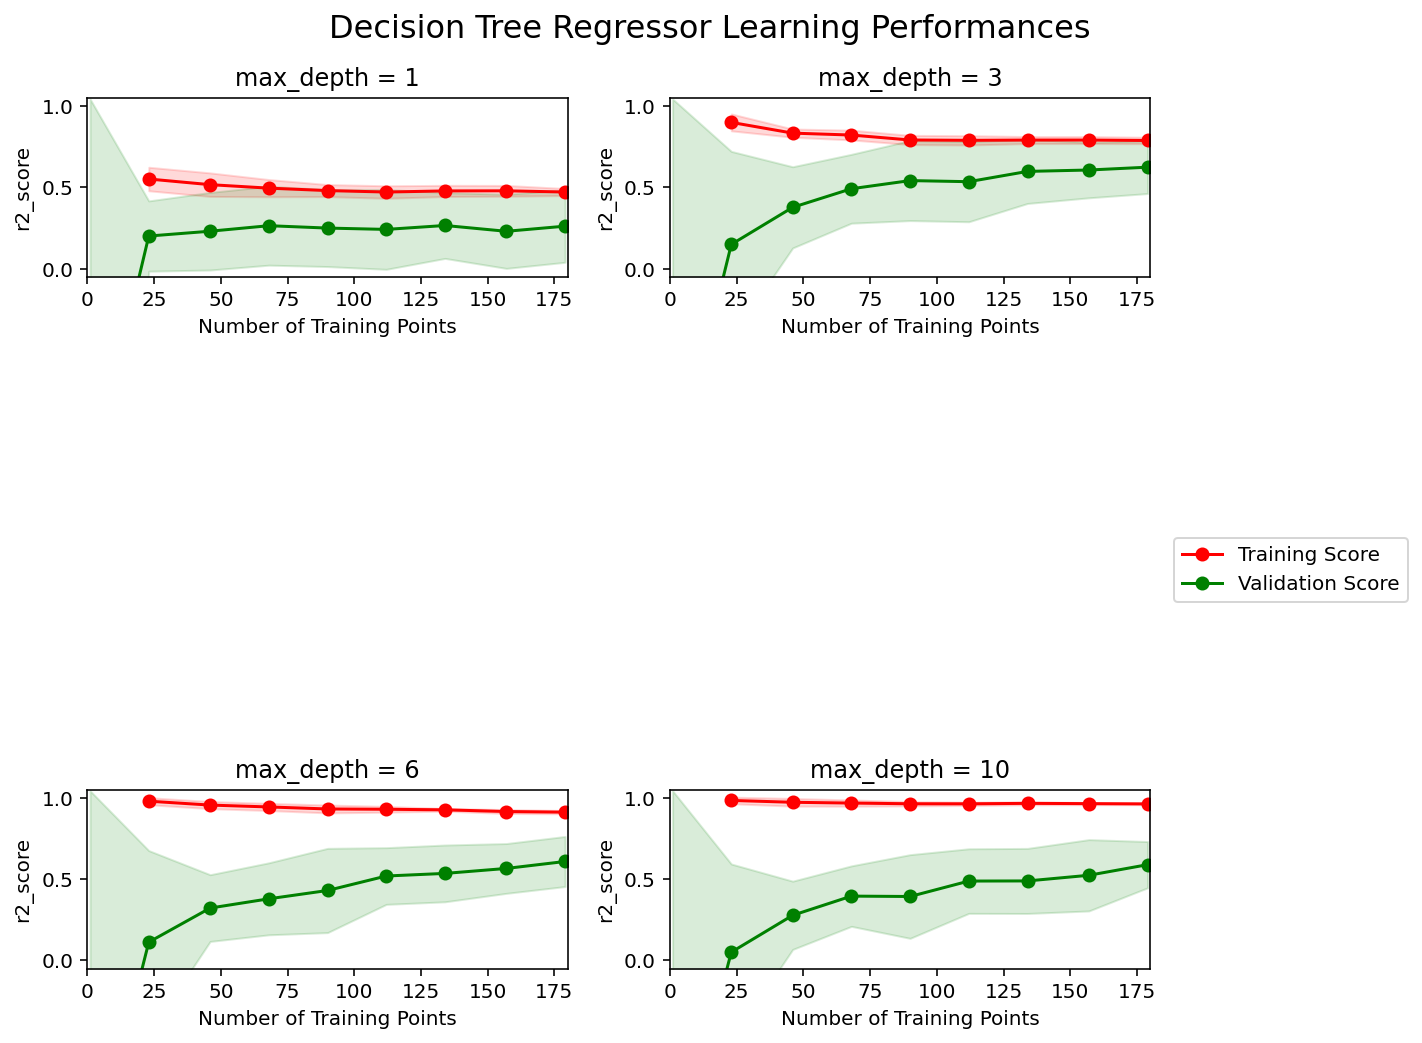

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(Features, Oil_Yields)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

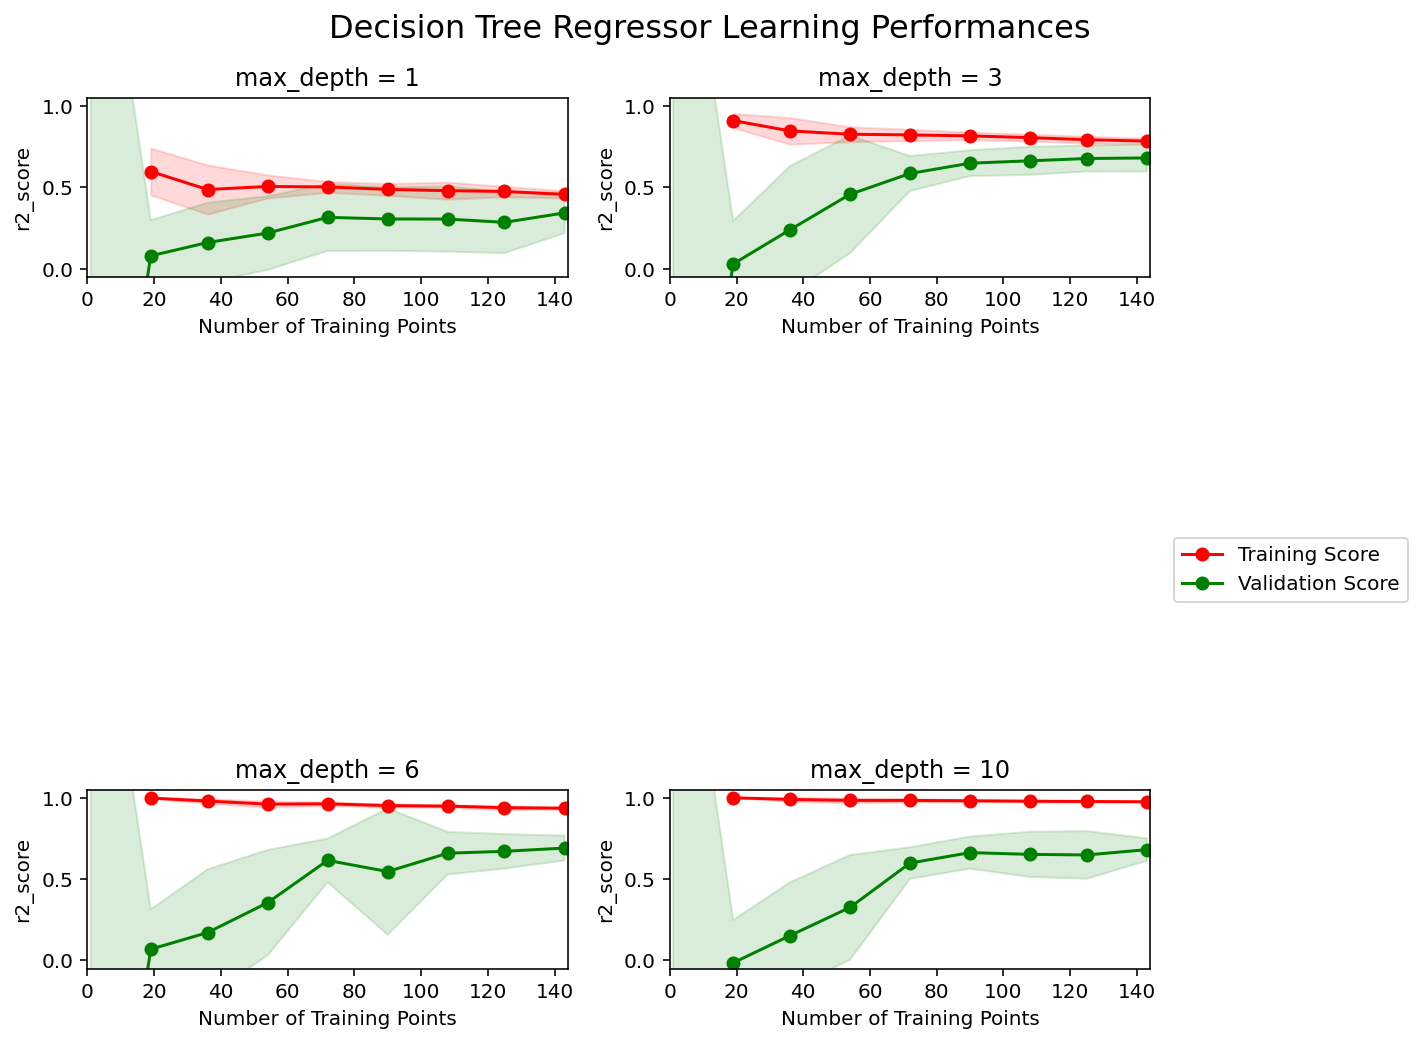

In [11]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(X_train, y_train)

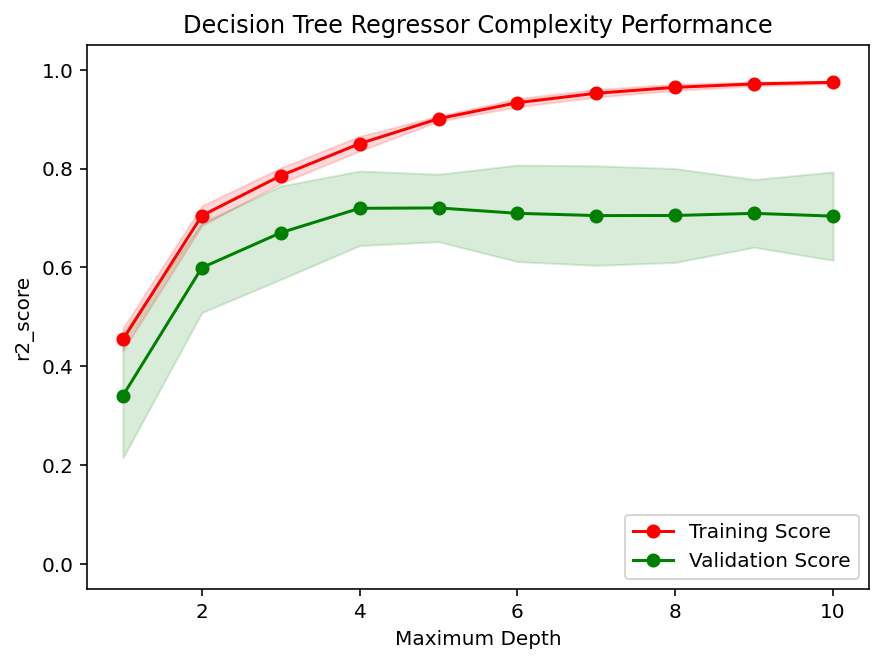

In [12]:
vs.ModelComplexity(X_train, y_train)

In [13]:
# TODO: Import 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

# TODO: Create a decision tree regressor object
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has RMSE of training set: 3.6457196201949036
Optimal model has RMSE of test set: 8.925160720446579
Optimal model has R2 score of training set 0.95 on test data.
Optimal model has R2 score of test set 0.80 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 25.00 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 47.44 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 28.96 wt%


In [ ]:
Parity={'Predict Data':y_test_predict,'Test Data':y_test}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe2.csv', index = False, header=True)

In [14]:
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, model.fit, feedstock_composition_data[i:i+1])

Trial 1: $25.00
Trial 2: $27.10
Trial 3: $25.00
Trial 4: $47.44
Trial 5: $25.00
Trial 6: $40.96
Trial 7: $47.44
Trial 8: $47.44
Trial 9: $25.00
Trial 10: $47.44

Range in prices: $22.44
Trial 1: $40.96
Trial 2: $47.44
Trial 3: $47.44
Trial 4: $47.44
Trial 5: $48.75
Trial 6: $47.44
Trial 7: $47.44
Trial 8: $47.44
Trial 9: $47.44
Trial 10: $47.44

Range in prices: $7.79
Trial 1: $28.96
Trial 2: $38.19
Trial 3: $28.96
Trial 4: $28.96
Trial 5: $29.20
Trial 6: $28.96
Trial 7: $28.96
Trial 8: $28.96
Trial 9: $41.00
Trial 10: $28.96

Range in prices: $12.04


In [15]:
# Evaluate model performance (use Grid Search)
# TODO: Import 'KFold', 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X,y):
  """Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]."""
  # Create cross-validation sets from the training data

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))

  cross_validator = KFold(n_splits=10, shuffle=True)

  # TODO: Create a decision tree regressor object
  regressor = DecisionTreeRegressor()

  # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
  params = {'max_depth':range(1,11)}

  # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
  scoring_fnc = make_scorer(performance_metric)

  # TODO: Create the grid search cv object --> GridSearchCV()
  # Make sure to include the right parameters in the object:
  # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
  grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cross_validator)

  # Fit the grid search object to the data to compute the optimal model
  grid = grid.fit(X,y)

  # Return the optimal model after fitting the data
  return grid.best_estimator_

# Prediction
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [16]:
# TODO: Import 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

# TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
params = {'max_depth':4}

# TODO: Create a decision tree regressor object
model = DecisionTreeRegressor(**params)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has RMSE of training set: 6.6921312024928605
Optimal model has RMSE of test set: 6.941392221406193
Optimal model has R2 score of training set 0.82 on test data.
Optimal model has R2 score of test set 0.88 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 37.29 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 37.29 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 34.49 wt%


In [17]:
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, model.fit, feedstock_composition_data[i:i+1])

Trial 1: $37.63
Trial 2: $33.16
Trial 3: $34.81
Trial 4: $35.02
Trial 5: $38.76
Trial 6: $37.90
Trial 7: $33.73
Trial 8: $35.18
Trial 9: $29.81
Trial 10: $33.94

Range in prices: $8.95
Trial 1: $37.63
Trial 2: $33.16
Trial 3: $34.81
Trial 4: $35.02
Trial 5: $38.76
Trial 6: $37.90
Trial 7: $33.73
Trial 8: $35.19
Trial 9: $29.81
Trial 10: $33.94

Range in prices: $8.95
Trial 1: $33.47
Trial 2: $34.54
Trial 3: $32.06
Trial 4: $35.30
Trial 5: $31.34
Trial 6: $34.63
Trial 7: $35.45
Trial 8: $35.90
Trial 9: $27.90
Trial 10: $36.44

Range in prices: $8.53


In [18]:
#Added by Wenjing
#To define evaluation metric "mean absolute error": 
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
# mean_absolute_percentage_error:https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
from sklearn.metrics import mean_absolute_error

def performance_metric3 (y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'
  score = mean_absolute_error(y_true, y_predict)

  # Return the score
  return score

In [56]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric4 (y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'
  actual, pred = np.array(y_true), np.array(y_predict)

  return np.mean(np.abs(actual-pred))/np.mean(actual)


In [58]:
# TODO: Import 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 10 folds.  
kf =KFold(n_splits=10, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')

#     X_train, X_test = Features[train_index[0]:train_index[-1]], Features[test_index[0]:test_index[-1]]
#     y_train, y_test = Oil_Yields[train_index[0]:train_index[-1]], Oil_Yields[test_index[0]:test_index[-1]]
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':4}
    
    # TODO: Create a decision tree regressor object
    model = DecisionTreeRegressor(**params)
    
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = performance_metric3(y_train, y_train_predict)
    MAE_test = performance_metric3(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = performance_metric(y_train, y_train_predict)
    r2_test = performance_metric(y_test, y_test_predict)

    MRE_train = performance_metric4(y_train, y_train_predict)
    MRE_test = performance_metric4(y_test, y_test_predict)

    print("Optimal model has MAE of training set:", MAE_train)
    print("Optimal model has MAE of test set:", MAE_test)
    print("Optimal model has RMSE of training set:", y_train_rmse)
    print("Optimal model has RMSE of test set:", y_test_rmse)
    print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    print("Optimal model has MRE of training set:", MRE_train)
    print("Optimal model has MRE of test set:", MRE_test)
    print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)


print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of test set", np.std(MAE_train_all))
print("Mean value of MAE of training set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of 2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of 2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of test set", np.std(MRE_train_all))
print("Mean value of MRE of training set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))


Fold:1, Train set: 202, Test set:23
Optimal model has MAE of training set: 5.491823471063211
Optimal model has MAE of test set: 4.93772045202096
Optimal model has RMSE of training set: 6.680793870724904
Optimal model has RMSE of test set: 6.309129013428502
Optimal model has R2 score of training set 0.81 on training data.
Optimal model has R2 score of test set 0.93 on test data.
Optimal model has MRE of training set: 0.20417744740074253
Optimal model has MRE of test set: 0.1533768345602691

Fold:2, Train set: 202, Test set:23
Optimal model has MAE of training set: 5.491668577628532
Optimal model has MAE of test set: 6.291632900632572
Optimal model has RMSE of training set: 6.847541150796208
Optimal model has RMSE of test set: 8.039239670910613
Optimal model has R2 score of training set 0.84 on training data.
Optimal model has R2 score of test set 0.66 on test data.
Optimal model has MRE of training set: 0.1969886666544074
Optimal model has MRE of test set: 0.26682614559529205

Fold:3, T

In [49]:
np.array(y_test)

array([58.6  , 31.8  , 40.5  , 39.7  , 28.96 , 22.2  , 31.3  , 16.438,
       19.7  , 37.4  , 18.7  , 26.179, 32.4  , 14.182, 31.2  ,  7.3  ,
       14.469, 20.37 , 18.63 , 13.3  ,  1.3  ,  0.1  ])

In [50]:
np.array(y_test_predict)

array([48.02352941, 48.02352941, 48.02352941, 35.27604348, 35.27604348,
       20.01474468, 35.27604348, 20.01474468, 20.01474468, 35.27604348,
       20.01474468, 20.01474468, 20.01474468, 20.01474468, 20.01474468,
       21.97857143, 23.20066667, 12.21207317, 12.21207317,  8.2675    ,
       12.21207317, 12.21207317])

In [59]:
np.mean(np.abs(y_test-y_test_predict))/np.mean(y_test)

0.3052348407308221

In [54]:
np.mean(y_test)

23.851272727272725

In [55]:
np.mean(np.abs(y_test-y_test_predict))/np.mean(y_test)

0.3052348407308221

In [22]:
def PredictTrials(Features, Oil_Yields, fit_model, feedstock_composition_data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    yields = []

    for k in range(10):

        np.random.seed(seed = 262)
        data['random'] = np.random.random(size = len(data))

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.1, random_state = k)

        # Fit the data
        reg = fit_model(X_train, y_train)

        # Make a prediction
        pred = reg.predict([feedstock_composition_data[2]])[0]
        yields.append(pred)

        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in yields: ${:,.2f}".format(max(yields) - min(yields)))

PredictTrials(Features, Oil_Yields, fit_model, feedstock_composition_data)

Trial 1: $32.15
Trial 2: $36.05
Trial 3: $34.12
Trial 4: $31.82
Trial 5: $34.21
Trial 6: $34.55
Trial 7: $35.01
Trial 8: $33.17
Trial 9: $31.44
Trial 10: $37.11

Range in yields: $5.68
